## Predicting Income Per Capita

### A Multilinear Regression Model

*by Charles Pryor & Akshay Indusekar*

We started by importing all of the necessary packages that we knew we would need.  I keep these in a separate file and import all of them at the same time whenever there is a project.

In [2]:
from libimport import *
%matplotlib inline

We found our data set on Kaggle.  This reflects the variables in which we want to produce a model that will predict income by state and several variables in which we ultimately decided upon as we perform metrics which tell us which is relevant.  We imported our data into pandas DataFrame.  Since this is such a large dataset, we wish to have the option to view more rows when necessary.

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

df = pd.read_csv('acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,0.0,0.0,4329,20522.0,2879.0,8643.0,1218.0,39.4,61.8,42.2,25.3,18.0,7.7,6.9,76.1,13.5,6.2,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,0.0,0.0,1716,24605.0,6027.0,11109.0,1829.0,35.5,39.9,34.4,13.4,23.1,12.3,16.8,82.0,7.5,9.2,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,0.2,0.0,1616,18225.0,4913.0,9603.0,2162.0,52.8,77.2,29.3,23.6,32.9,4.6,9.6,85.3,7.8,0.0,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,0.0,0.0,3346,18688.0,4501.0,8331.0,1280.0,50.1,58.0,29.8,20.6,28.8,13.9,6.9,97.1,1.8,1.1,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


We start to analyze our data set.  Here we wish to see if our set includes all of the states.  The original data set has 74,001 rows and 37 columns.  It is here that we can also see the spread of the columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


It is imperative that we see a true representation of all states in the Union since we are predicting salary by each state.

In [5]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

We now check for null values in our data set.

In [6]:
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

We see that we have many columns with null values.  Being that we have a data set with over 74,000 rows, we decided to drop all of the rows containing null values.

In [7]:
df = df[df['Income'].notna()]
df = df[df['ChildPoverty'].notna()]
df = df[df['MeanCommute'].notna()]

We then check to see if our data cleaned properly.

In [8]:
df.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

As a crucial part of data cleaning, especially for a set this size, we must check for duplicates.  Fortunately, there are none.  We suspect that it is because the data set came from the census bureau.

In [9]:
df.duplicated().sum()

0

We now must decide which variables that we will use in our model.  We evaluated each feature and determined the ones that directly affect Income Per Capita. Below is the code and output of our decision making.

In [10]:
df1 = df[['IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
          'Construction', 'Office', 'Production']]
df1

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,33018.0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,18996.0,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,21236.0,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,28068.0,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,36905.0,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...,...
73996,8643.0,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,11109.0,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,9603.0,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,8331.0,50.1,58.0,29.8,20.6,13.9,28.8,6.9


From our data, we then constructed a heatmap so we can see how each of the variables we selected correlate to each other using Pearson's R.

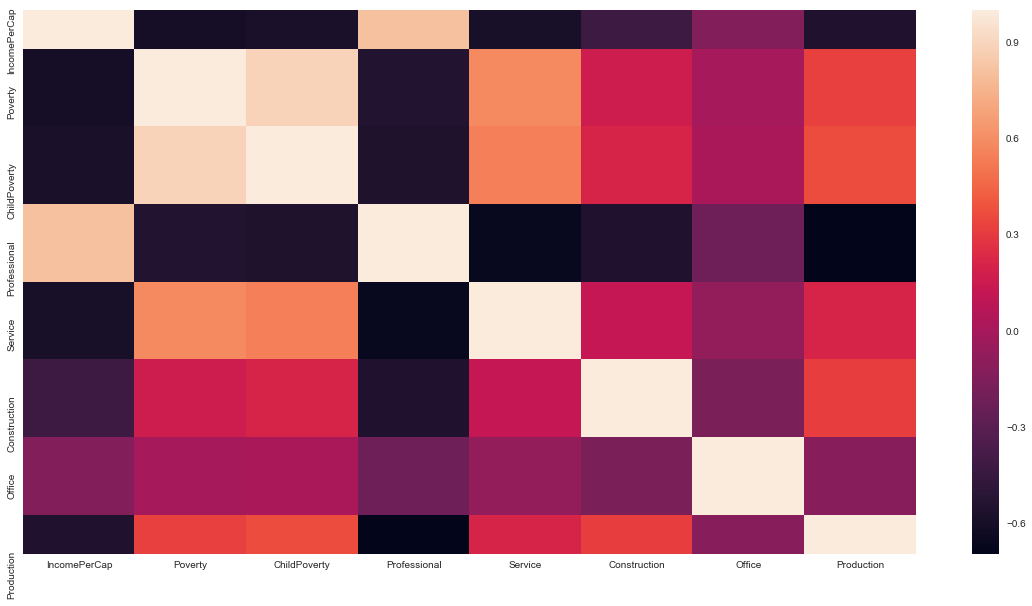

In [11]:
corr = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

We then calculated the variance inflation factor which is used to explore multicolinearity between the independent variables. Although the Office variable had a variance inflation factor greater than 10 which makes it a candidate for multicolinearity, we decided to keep it in our model because without it sum percentage of all occupation types would not equal 100%.  We also decided to remove Child Poverty because it had a high VIF value and the existing Poverty feature already explains that variable.

In [12]:
refined_cols = ['Poverty', 'Office', 'Professional', 'Service', 
                'Construction', 'Production']
X = df1[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Poverty', 4.374656628571393),
 ('Office', 11.118577758022248),
 ('Professional', 4.728411696864023),
 ('Service', 8.422823531174561),
 ('Construction', 3.572582554041673),
 ('Production', 4.577552759536368)]

We now must decide what to do with our outliers.  We must do this so that when we design our model, it will show positive linear relationships.  We decided to cleanse all of our data of any outliers. We wanted to see as close to a normal distribution as possible for each feature.  This is a tedious process and one that makes for several adjustments to the code.  For efficiency, we will display the final visualizations with the outliers deleted.  The visualizations and code are presented below.

This is the code in which we did our filtering.  Notice that the dataframe name has changed to the variable, df_filtered.

In [13]:
df_filtered = df1[(df1['Office'] >= 10) & (df1['Office'] <= 45)& (df1['Service'] <= 50)
                & (df1['Poverty'] <= 45) & (df1['Construction'] <= 22) 
                & (df1['IncomePerCap'] <= 70000)]
df_filtered

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,33018.0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,18996.0,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,21236.0,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,28068.0,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,36905.0,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...,...
73983,8133.0,42.4,52.7,12.7,31.9,9.2,21.2,25.0
73988,10930.0,43.6,55.2,31.3,29.8,12.0,18.3,8.5
73994,10642.0,29.2,33.4,37.0,15.6,6.1,28.5,12.8
73996,8643.0,39.4,61.8,42.2,25.3,7.7,18.0,6.9


In [14]:
df_filtered.describe()

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
count,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000
mean,29929.306959,14.663590,19.622673,35.539870,18.717611,8.950382,23.699062,13.093258
std,11723.239158,9.992515,16.291147,13.694102,7.340579,4.824538,5.243215,7.420339
min,1631.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,21470.750000,6.900000,6.300000,25.500000,13.500000,5.200000,20.100000,7.400000
50%,27650.000000,12.200000,15.700000,33.700000,17.700000,8.400000,23.500000,12.000000
75%,36106.000000,20.300000,29.600000,44.400000,22.900000,12.200000,27.000000,17.500000
max,69993.000000,45.000000,100.000000,85.500000,50.000000,22.000000,45.000000,60.500000


After each outlier elimination session, we saw where our values now lie.  We looked at this chart along with the new distributions to determine of more outlier elimination was needed.

In [15]:
df_filtered.describe()

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
count,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000
mean,29929.306959,14.663590,19.622673,35.539870,18.717611,8.950382,23.699062,13.093258
std,11723.239158,9.992515,16.291147,13.694102,7.340579,4.824538,5.243215,7.420339
min,1631.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,21470.750000,6.900000,6.300000,25.500000,13.500000,5.200000,20.100000,7.400000
50%,27650.000000,12.200000,15.700000,33.700000,17.700000,8.400000,23.500000,12.000000
75%,36106.000000,20.300000,29.600000,44.400000,22.900000,12.200000,27.000000,17.500000
max,69993.000000,45.000000,100.000000,85.500000,50.000000,22.000000,45.000000,60.500000


Our Y variable is IncomePerCap.  We demonstrated the outliers with a box plot and a histogram.

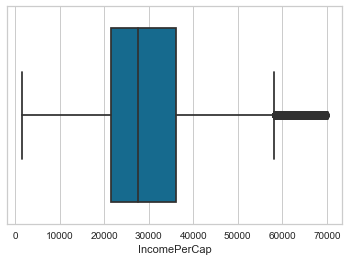

In [16]:
sns.boxplot(df_filtered.IncomePerCap)

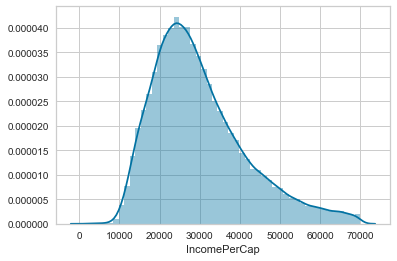

In [17]:
sns.distplot(df_filtered['IncomePerCap'])

The Poverty distribution was extremely skewed right with a lot of data underneath the right tail.  If we got rid of more data in this category, it would negatively affect the quality of model.  This was by far the most difficult feature to edit.

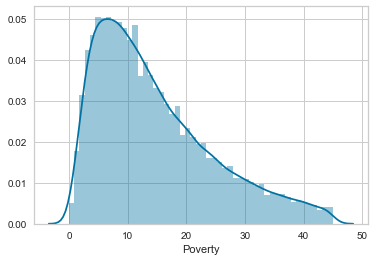

In [18]:
sns.distplot(df_filtered['Poverty'])

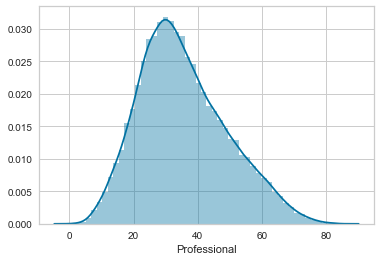

In [19]:
sns.distplot(df_filtered['Professional'])

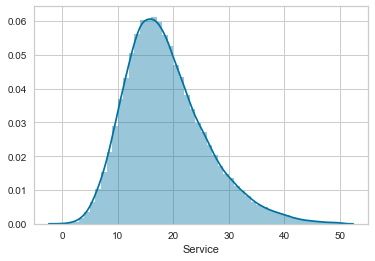

In [20]:
sns.distplot(df_filtered['Service'])
plt.show()

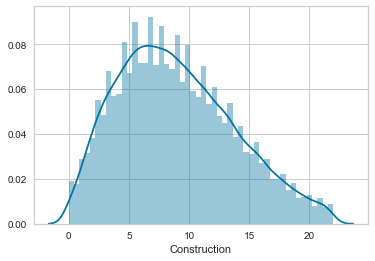

In [21]:
sns.distplot(df_filtered['Construction'])

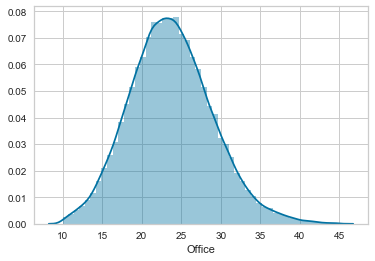

In [22]:
sns.distplot(df_filtered['Office'])
plt.show()

We now have a clear x and y variable to start regression.

In [23]:
X = df_filtered[refined_cols]
y = df_filtered['IncomePerCap']

We should now start the regression and look at the R2 and adjusted R2 values.

We created a test train variable to begin testing.  We set x to the 2nd power so we can normalize the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X**2, y, test_size=0.2, random_state = 45)

We further normalized the data by performing a scaling function.  We do this because all of the data does not fit a normal distriniutiona s referenced by the aboce graphs and we cannot realistically delete anymore outliers.

In [25]:
ss = StandardScaler()
scaledxtrain = ss.fit_transform(X_train)
scaledxtest = ss.transform(X_test)

We tested the scaled model.

In [26]:
#X = df[refined_cols]
X2 = sm.add_constant(scaledxtest)
model = sm.OLS(y_test, X2, hasconst= True, exog_name = refined_cols)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     7028.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:09:48   Log-Likelihood:            -1.3239e+05
No. Observations:               13140   AIC:                         2.648e+05
Df Residuals:                   13133   BIC:                         2.648e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           3e+04     50.150    598.212      0.000    2.99e+04    3.01e+04
x1         -3564.3291     61.398    -58.053      0.000   -3684.677   -3443.981
x2           986.0245     73.173     13.475      0.000     842.595    1129.454
x3          9096.1631    117.532     77.393      0.000    8865.783    9326.544
x4           549.1411     86.760      6.329      0.000     379.078     719.204
x5           339.9152     71.632      4.745      0.000     199.506     480.324
x6           227.6837     79.048      2.880      0.004      72.739     382.628
==============================================================================
Omnibus:                     1581.399   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6069.080
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       6.131   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(X.shape)
y.values.reshape(-1,1).shape

(65696, 6)


(65696, 1)

In [28]:
y.values.reshape(-1,1)


array([[33018.],
       [18996.],
       [21236.],
       ...,
       [10642.],
       [ 8643.],
       [11109.]])

In the above execution of the code, we see that our R value and adjusted R value is the same.  This is because we have very few columns that will contirbute to our dependent variable(Income Per Capita)

We assigned y to a box-cox method to help normalize our graphs.

In [29]:
y = power_transform(_, method = 'box-cox')

Here we are gathering informstion on our features to further fine tune our model.

In [30]:
X = df_filtered[refined_cols]
y = (df_filtered['IncomePerCap'])
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=6 )

## fit the model
selector.fit(X,y)
## check which columns are selected
ind = selector.get_support()
print(ind)
X.loc[:,ind].head()

[ True  True  True  True  True  True]


,Poverty,Office,Professional,Service,Construction,Production
0,10.7,22.8,38.5,15.6,10.8,12.4
1,22.4,22.9,30.5,24.9,6.3,15.4
2,14.7,33.3,27.9,19.4,9.9,9.6
3,2.3,25.8,29.0,16.6,9.1,19.5
4,12.2,20.5,48.8,13.8,3.5,13.4


We compared R2 with these predictors

In [31]:
lm6 = selector.estimator_
R2 = lm6.score(X.loc[:, ind],y)
print(R2)

0.7580161038438501


In [32]:
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.7580050530052629


We need a y_predict score to calculate our residuals.

In [34]:
y_predict = lm6.predict(X)

Various reshaping took place to fit our model.

In [35]:
print(y.values.reshape(-1,1).shape)
print(y_predict.reshape(-1,1).shape)

(65696, 1)
(65696, 1)


In [36]:
y_predict.shape

(65696,)

In [37]:
residuals = y - y_predict
residuals

0          142.027027
1        -5348.427218
2        -4902.790200
3        -2849.433270
4        -1237.307749
             ...     
73983     1452.492386
73988    -5682.152175
73994   -14846.398283
73996   -15596.934728
73997    -9959.888581
Name: IncomePerCap, Length: 65696, dtype: float64

Here is the scatter plot of the residuals.  ZTHis is the best fit we could secure after cleaning and adjusting the data.

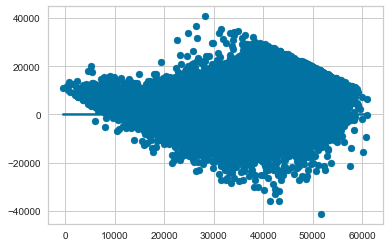

In [38]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df_filtered))])
plt.show()

Here is a qq plot to see how our data spreads.

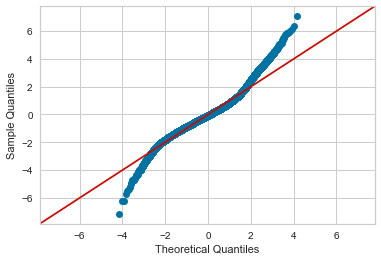

In [39]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

This is the residuals plot with train and test scores done through yellow brick.

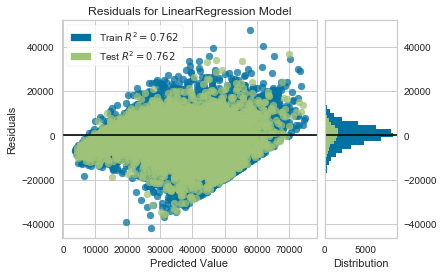

In [40]:
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Now we the model is ready to be tested.

In [42]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(np.array([[5, 35, 55, 8 ,1, 1]]))

array([45184.82197749])